In [46]:
import pandas as pd
import numpy as np
import scipy.stats as si
import sympy as sy
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display
pd.options.display.max_columns = None

In [47]:
df = pd.read_csv('SpFuturesIndicators.txt')
#Description of indicators
#FastAvg = 10 day Exponential Moving Average (EMA)
#MedAvg = 30 day Exponential Moving Average (EMA)
#SlowAvg = 100 day Exponential Moving Average (EMA)
#VerySlowAvg = 200 day Exponential Moving Average (EMA)
#MACD is the difference between two EMA (10 day and 30 day)
#MACDAvg is the average difference over specified timeframe (30 days)
#MACDDiff is the difference between the MACD and MACDAvg
#RSI is the relative strength index, attempts to measure the strength of a trend (between 0 and 100)
#ADX is similar to RSI in purpose
#UpperBand and LowerBand refers to the moving 30 stddev up 2 and down -2 deviations
#HRetrace and LRetrace refer to the upper and lower retrace estimates based on fibinacci sequence
#TSF is a time series forecast, using the last 30 days to create a regression line
#PFE (Polarized Fractal Efficiency) indicator calculates and displays the efficiency of price movement
    #between two price points by comparing the straight-line distance between the two price points to the
    #actual distance that price traveled between the two price points. The calculations are based on the Pythagorean theorem. 
#PsycLine (Psychological Line) indicator calculates a ratio based on the number of up bars (price higher than previous bar)
    #over a specified number of bars. A ratio greater than 50 (50%) indicates that there are more buyers than sellers.  
#SwingX Swing Index indicator assigns a Swing Index value from 0 to 100 for an up bar and 0 to -100 for a down bar. 
    #This indicator uses the current bar's Open, High, Low, and Close as well as the previous bar's Open and Close
    #to calculate the Swing Index values. 
#VolROC (Volume Rate of Change) indicator compares the most current bar's volume to the volume of a bar in the past
    #(default is 14 bars ago). The difference is calculated as a percentage    
    

In [48]:
df.loc[30:35,:]

,Date,Time,Open,High,Low,Close,Vol,OI,FastAvg,MedAvg,SlowAvg,VerySlowAvg,MACD,MACDAvg,MACDDiff,ZeroLine,RSI,OverBot,OverSld,ADX,TrigLevel,UpperBand,LowerBand,MidLine,HRetrace,LRetrace,CROSS FIB,TSF,PFE,OverBought,OverSold,ZeroLine.1,OB OS Cross,PsycLine,OverBot.1,OverSld.1,OB/OS Zone,SwingX,ZeroLine.2,PLOT1,VolROC,ZeroLine.3
30,10/23/1997,16:00,1118.75,1120.00,1093.25,1101.75,13536,13601,1113.03,1106.10,1085.24,1076.25,6.93,11.16,-4.23,0.0,0.00,0.0,0.0,0.00,0.0,1139.03,1079.26,1109.14,1107.92,1089.33,0.0,1117.79,21.56,40.0,-40.0,0.0,0.0,53.33,75.0,25.0,0.0,-0.44,0.0,0.0,45.94,0.0
31,10/24/1997,16:00,1101.75,1114.75,1087.25,1089.25,14850,13590,1108.71,1105.02,1085.32,1076.38,3.69,9.80,-6.11,0.0,55.39,70.0,30.0,2.01,20.0,1136.00,1083.94,1109.97,1113.84,1098.91,0.0,1116.48,20.29,40.0,-40.0,0.0,0.0,50.00,75.0,25.0,0.0,-0.18,0.0,0.0,128.25,0.0
32,10/27/1997,16:00,1088.25,1089.75,1019.75,1019.75,14950,14940,1092.53,1099.51,1084.02,1075.82,-6.98,6.75,-13.73,0.0,42.19,70.0,30.0,13.25,20.0,1148.10,1068.02,1108.06,1092.83,1064.92,0.0,1116.75,10.65,40.0,-40.0,0.0,0.0,46.67,75.0,25.0,0.0,-1.69,0.0,0.0,292.90,0.0
33,10/28/1997,16:00,1007.75,1078.75,989.75,1070.25,16858,14796,1088.48,1097.63,1083.75,1075.76,-9.14,3.86,-13.01,0.0,50.97,70.0,30.0,19.68,20.0,1149.25,1064.77,1107.01,1081.37,1046.38,0.0,1111.88,6.21,40.0,-40.0,0.0,0.0,46.67,75.0,25.0,0.0,0.60,0.0,0.0,41.39,0.0
34,10/29/1997,16:00,1069.75,1087.75,1062.00,1070.75,15742,15354,1085.26,1095.89,1083.49,1075.71,-10.63,1.23,-11.86,0.0,51.05,70.0,30.0,21.83,20.0,1150.15,1061.80,1105.97,1081.37,1046.38,0.0,1106.40,2.51,40.0,-40.0,0.0,0.0,50.00,75.0,25.0,0.0,0.12,0.0,0.0,62.04,0.0
35,10/30/1997,16:00,1070.25,1074.25,1047.75,1048.00,13828,15041,1078.48,1092.80,1082.79,1075.43,-14.32,-1.60,-12.72,0.0,47.57,70.0,30.0,23.84,20.0,1152.95,1055.28,1104.12,1081.37,1046.38,0.0,1104.07,-1.53,40.0,-40.0,0.0,0.0,46.67,75.0,25.0,0.0,-0.48,0.0,0.0,6.39,0.0


In [49]:
dropped_col = ['Time','ZeroLine','OverBot','OverSld','TrigLevel','MidLine','CROSS FIB','OverBought','OverSold','ZeroLine.1','OB OS Cross','OverBot.1','OverSld.1','OB/OS Zone','ZeroLine.2','PLOT1','ZeroLine.3']

In [50]:
#drop unneeded columns
new_df = df.drop(dropped_col, axis=1)
new_df.loc[28:35,:]

,Date,Open,High,Low,Close,Vol,OI,FastAvg,MedAvg,SlowAvg,VerySlowAvg,MACD,MACDAvg,MACDDiff,RSI,ADX,UpperBand,LowerBand,HRetrace,LRetrace,TSF,PFE,PsycLine,SwingX,VolROC
28,10/21/1997,1109.25,1126.25,1107.75,1124.75,10576,12755,1114.61,1105.48,1084.20,1075.55,9.12,12.76,-3.64,0.00,0.00,0.00,0.00,0.00,0.00,1122.14,0.00,0.00,0.00,-8.97
29,10/22/1997,1124.75,1126.25,1116.25,1119.75,10172,12717,1115.54,1106.40,1084.91,1075.99,9.14,12.10,-2.96,0.00,0.00,0.00,0.00,0.00,0.00,1119.23,0.00,0.00,0.00,-36.89
30,10/23/1997,1118.75,1120.00,1093.25,1101.75,13536,13601,1113.03,1106.10,1085.24,1076.25,6.93,11.16,-4.23,0.00,0.00,1139.03,1079.26,1107.92,1089.33,1117.79,21.56,53.33,-0.44,45.94
31,10/24/1997,1101.75,1114.75,1087.25,1089.25,14850,13590,1108.71,1105.02,1085.32,1076.38,3.69,9.80,-6.11,55.39,2.01,1136.00,1083.94,1113.84,1098.91,1116.48,20.29,50.00,-0.18,128.25
32,10/27/1997,1088.25,1089.75,1019.75,1019.75,14950,14940,1092.53,1099.51,1084.02,1075.82,-6.98,6.75,-13.73,42.19,13.25,1148.10,1068.02,1092.83,1064.92,1116.75,10.65,46.67,-1.69,292.90
33,10/28/1997,1007.75,1078.75,989.75,1070.25,16858,14796,1088.48,1097.63,1083.75,1075.76,-9.14,3.86,-13.01,50.97,19.68,1149.25,1064.77,1081.37,1046.38,1111.88,6.21,46.67,0.60,41.39
34,10/29/1997,1069.75,1087.75,1062.00,1070.75,15742,15354,1085.26,1095.89,1083.49,1075.71,-10.63,1.23,-11.86,51.05,21.83,1150.15,1061.80,1081.37,1046.38,1106.40,2.51,50.00,0.12,62.04
35,10/30/1997,1070.25,1074.25,1047.75,1048.00,13828,15041,1078.48,1092.80,1082.79,1075.43,-14.32,-1.60,-12.72,47.57,23.84,1152.95,1055.28,1081.37,1046.38,1104.07,-1.53,46.67,-0.48,6.39


In [51]:
#remove first 31 rows because the indicators don't have values
new2_df = new_df.loc[30:,:]
new3_df = new2_df.reset_index(drop=True)
new3_df.loc[0:5,:]

,Date,Open,High,Low,Close,Vol,OI,FastAvg,MedAvg,SlowAvg,VerySlowAvg,MACD,MACDAvg,MACDDiff,RSI,ADX,UpperBand,LowerBand,HRetrace,LRetrace,TSF,PFE,PsycLine,SwingX,VolROC
0,10/23/1997,1118.75,1120.00,1093.25,1101.75,13536,13601,1113.03,1106.10,1085.24,1076.25,6.93,11.16,-4.23,0.00,0.00,1139.03,1079.26,1107.92,1089.33,1117.79,21.56,53.33,-0.44,45.94
1,10/24/1997,1101.75,1114.75,1087.25,1089.25,14850,13590,1108.71,1105.02,1085.32,1076.38,3.69,9.80,-6.11,55.39,2.01,1136.00,1083.94,1113.84,1098.91,1116.48,20.29,50.00,-0.18,128.25
2,10/27/1997,1088.25,1089.75,1019.75,1019.75,14950,14940,1092.53,1099.51,1084.02,1075.82,-6.98,6.75,-13.73,42.19,13.25,1148.10,1068.02,1092.83,1064.92,1116.75,10.65,46.67,-1.69,292.90
3,10/28/1997,1007.75,1078.75,989.75,1070.25,16858,14796,1088.48,1097.63,1083.75,1075.76,-9.14,3.86,-13.01,50.97,19.68,1149.25,1064.77,1081.37,1046.38,1111.88,6.21,46.67,0.60,41.39
4,10/29/1997,1069.75,1087.75,1062.00,1070.75,15742,15354,1085.26,1095.89,1083.49,1075.71,-10.63,1.23,-11.86,51.05,21.83,1150.15,1061.80,1081.37,1046.38,1106.40,2.51,50.00,0.12,62.04
5,10/30/1997,1070.25,1074.25,1047.75,1048.00,13828,15041,1078.48,1092.80,1082.79,1075.43,-14.32,-1.60,-12.72,47.57,23.84,1152.95,1055.28,1081.37,1046.38,1104.07,-1.53,46.67,-0.48,6.39


In [59]:
#create 10 day log returns
#lag close values by 10 for 10 day return
lag_close = new3_df['Close'].shift(-10).fillna(0)
new3_df['Lag_close'] = lag_close
#create ln returns column
#first create function to handle zero in lagged data
def log_error(list1,list2):
    """if list contains zero in numerator or denominator, function returns zero"""
    """requires two lists. will generate a warning if df slice is used"""
    for i,j in enumerate(list1):
        if j == 0:
            list1[i] = list2[i]
    for k,l in enumerate(list2):
        if l == 0:
            list2[k] = list1[k]
    return [np.log(x/y) for x, y in zip(list1, list2)]
#convert slices into lists to insert into function
lagged = new3_df['Lag_close'].values.tolist()
un_lagged = new3_df['Close'].values.tolist()
#add log_return column
new3_df['Log_Return'] = log_error(lagged,un_lagged)
#add a up/down ind column
new3_df['UpDn'] =  np.where(new3_df['Log_Return'] > 0, 1, 0)
#create new column = sum(standardized indicators)
#list of columns to standardize
c = list(new3_df)
#convert list into set
col_set = set(c)
remove_col_set = set(['Date','Open','High','Low','Log_Return','UpDn'])
#select the columns in col_set that are not in remove_col_set
col_diff_set = list(col_set.difference(remove_col_set))
#standardize indicators only
stdized_part_df = new3_df[col_diff_set].apply(lambda x: (x-x.mean())/np.std(x,axis=0))
#insert in column (sum of standardized indicators) into original df call it 'Comb_Ind'
stdized_part_df['Comb_Ind'] = stdized_part_df.sum(axis=1)
new3_df['Comb_Ind'] = stdized_part_df['Comb_Ind']
new3_df[0:5]

,Date,Open,High,Low,Close,Vol,OI,FastAvg,MedAvg,SlowAvg,VerySlowAvg,MACD,MACDAvg,MACDDiff,RSI,ADX,UpperBand,LowerBand,HRetrace,LRetrace,TSF,PFE,PsycLine,SwingX,VolROC,Lag_close,Log_Return,UpDn,Comb_Ind
0,10/23/1997,1118.75,1120.00,1093.25,1101.75,13536,13601,1113.03,1106.10,1085.24,1076.25,6.93,11.16,-4.23,0.00,0.00,1139.03,1079.26,1107.92,1089.33,1117.79,21.56,53.33,-0.44,45.94,1087.75,-0.012788,0,-20.768671
1,10/24/1997,1101.75,1114.75,1087.25,1089.25,14850,13590,1108.71,1105.02,1085.32,1076.38,3.69,9.80,-6.11,55.39,2.01,1136.00,1083.94,1113.84,1098.91,1116.48,20.29,50.00,-0.18,128.25,1080.00,-0.008528,0,-12.600712
2,10/27/1997,1088.25,1089.75,1019.75,1019.75,14950,14940,1092.53,1099.51,1084.02,1075.82,-6.98,6.75,-13.73,42.19,13.25,1148.10,1068.02,1092.83,1064.92,1116.75,10.65,46.67,-1.69,292.90,1071.75,0.049735,1,-20.097339
3,10/28/1997,1007.75,1078.75,989.75,1070.25,16858,14796,1088.48,1097.63,1083.75,1075.76,-9.14,3.86,-13.01,50.97,19.68,1149.25,1064.77,1081.37,1046.38,1111.88,6.21,46.67,0.60,41.39,1072.50,0.002100,1,-11.083918
4,10/29/1997,1069.75,1087.75,1062.00,1070.75,15742,15354,1085.26,1095.89,1083.49,1075.71,-10.63,1.23,-11.86,51.05,21.83,1150.15,1061.80,1081.37,1046.38,1106.40,2.51,50.00,0.12,62.04,1054.50,-0.015293,0,-12.111287


In [ ]:
#create final df
final_df = new3_df

Text(0.5,1,'MedAvg, Lag_close')

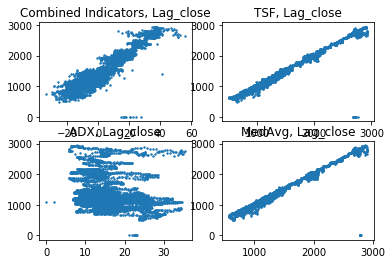

In [65]:
#compare a few indicators to the lagged close values to check for correlations
plt.subplot(2,2,1)
#plt.ylim(-.15,.15)
plt.scatter(final_df['Comb_Ind'],final_df['Lag_close'],s=2)
plt.title('Combined Indicators, Lag_close')
plt.subplot(2,2,2)
#plt.ylim(-.15,.15)
plt.scatter(final_df['TSF'],final_df['Lag_close'],s=2)
plt.title('TSF, Lag_close')
plt.subplot(2,2,3)
#plt.ylim(-.15,.15)
plt.scatter(final_df['ADX'],final_df['Lag_close'],s=2)
plt.title('ADX, Lag_close')
plt.subplot(2,2,4)
#plt.ylim(-.15,.15)
plt.scatter(final_df['MedAvg'],final_df['Lag_close'],s=2)
plt.title('MedAvg, Lag_close')

Text(0.5,1,'FastAvg, HRetrace')

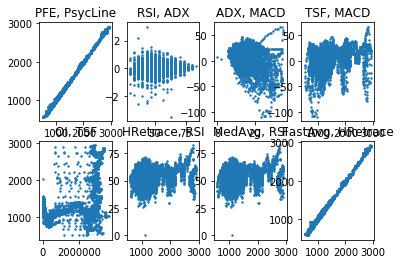

In [66]:
#compare a few indicators to check for correlations
plt.subplot(2,4,1)
plt.scatter(final_df['TSF'],final_df['MedAvg'],s=2)
plt.title('TSF, MedAvg')
plt.subplot(2,4,2)
plt.scatter(final_df['PsycLine'],final_df['SwingX'],s=2)
plt.title('RSI, ADX')
plt.subplot(2,4,3)
plt.scatter(final_df['ADX'],final_df['MACD'],s=2)
plt.title('ADX, MACD')
plt.subplot(2,4,4)
plt.scatter(final_df['TSF'],final_df['MACD'],s=2)
plt.title('TSF, MACD')
plt.subplot(2,4,5)
plt.scatter(final_df['OI'],final_df['TSF'],s=2)
plt.title('OI, TSF')
plt.subplot(2,4,6)
plt.scatter(final_df['HRetrace'],final_df['RSI'],s=2)
plt.title('HRetrace, RSI')
plt.subplot(2,4,7)
plt.scatter(final_df['MedAvg'],final_df['RSI'],s=2)
plt.title('MedAvg, RSI')
plt.subplot(2,4,8)
plt.scatter(final_df['FastAvg'],final_df['HRetrace'],s=2)
plt.title('FastAvg, HRetrace')


Text(0.5,0,'Returns')

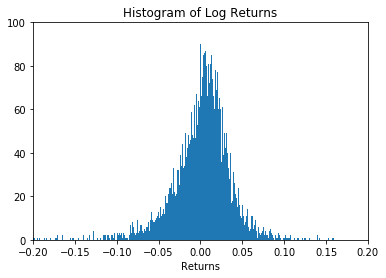

In [64]:
#Look at log returns
plt.hist(final_df['Log_Return'],bins=700)
plt.axis([-.2,.2,0,100])
plt.title('Histogram of Log Returns')
plt.xlabel('Returns')